In [409]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

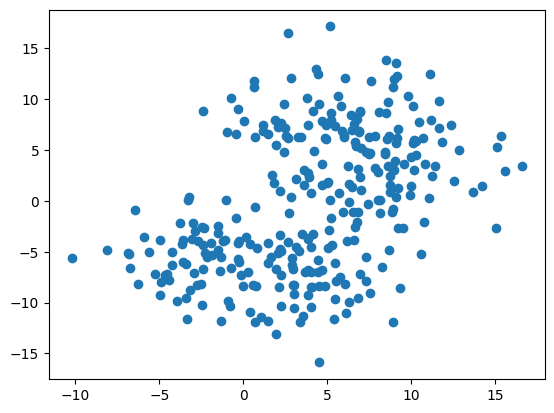

In [410]:
# Tạo 300 điểm với 4 phân cụm và vẽ lên
numbeFeaturesSupper = 2
numberCentroids = 4
x, y = make_blobs(n_samples=300, n_features=numbeFeaturesSupper, cluster_std=3, centers=numberCentroids, random_state=2911)
plt.scatter(x[:,0], x[:,1])
# n_samples : số lượng điểm
# n_features : số lượng tính chất của một điểm
# cluster : khoảng cách các đứa con tới đứa cha
# center : só lượng cụm
# random_state : không có gì ngẫu nhiên, đây là số để tạo ra các số ngẫu nhiên
# print(x)

In [411]:
# Viết hàm tính Phân cụm
def getNumFeatures(dataSet: np.array):
    return dataSet.shape[1]
def getRandomCentroids(dataSet : np.array, k : int):
    # lấy ra k điểm dataSet.shape[0] là số hàng của dataSet được làm dữ liệu, 
    # replace: các dữ liệu lặp lại hay không
    # np.random.seed(29) 
    # cái này giống cái random_state ấy, hạt giống cho hàm random
    # nếu muốn các giá trị giống nhau thì bật nó lên
    return x[np.random.choice(dataSet.shape[0], size = k, replace=False)]

# shouldStop : kiểm tra xem centroid cũ với centroid mới có bằng nhau hay không
#              nhận vào 2 điểm tạo độ, trả về là một bool
def shouldStop(oldCentroinds : np.array, centrodis : np.array) -> bool:
    check = oldCentroinds == centrodis
    return check.all()

def getDistance(vectorA : np.array, vectorB : np.array):
    return np.sqrt(np.sum((vectorA - vectorB) ** 2))

def getLables(dataSet : np.array, centroids : np.array):
    res = np.empty(0, dtype=np.int64) # khởi tạo mảng np.array rỗng 0 phần tử
    for i in dataSet:
        distances = [getDistance(vectorA=i, vectorB=x) for x in centroids]
        res = np.append(res, np.argmin(distances))
        # minDis = max(distances) + 10
        # indexMin = -1
        # for t in range(len(distances)):
        #     if (distances[t] < minDis):
        #         indexMin = t
        #         minDis = distances[t]
        # res = np.append(res, indexMin)
    return res

def getCentroids(dataSet : np.array, lables : np.array, k : int) -> np.array:
    res = np.empty((k, getNumFeatures(dataSet)))
    for i in range(k):
        # print(np.mean(dataSet[lables == i, :], axis=0))
        res[i, :] = np.mean(dataSet[lables == i, :], axis=0)
    return res

def kMeans(dataSet, k):
    numberFeatures = getNumFeatures(dataSet=dataSet)
    centroids = getRandomCentroids(dataSet=dataSet, k=k)
    oldCentroids = None
    while not shouldStop(oldCentroinds=oldCentroids,centrodis=centroids):
        oldCentroids = centroids
        labels = getLables(dataSet=dataSet, centroids=centroids)
        centroids = getCentroids(dataSet=dataSet, lables=labels, k=k)

    return centroids, labels


In [412]:
# Chạy hàm tính K-means với dữ liệu ở trên
centroids, labels = kMeans(dataSet=x, k=numberCentroids)
print(f'Centroids: {centroids}')
print(f'labels: {labels}')

Centroids: [[ 9.33941997  6.91641748]
 [ 0.17887957 -6.62713211]
 [ 2.87080858  8.41074503]
 [ 7.24295542 -0.17496781]]
labels: [1 1 1 3 3 3 1 0 0 1 2 1 0 1 1 0 1 1 1 1 1 3 1 0 1 0 0 1 3 1 3 0 1 0 2 2 3
 2 1 0 0 2 1 3 3 1 2 0 3 1 2 1 1 1 3 1 1 1 3 1 3 0 1 0 0 1 3 1 1 1 0 1 1 0
 3 3 3 1 1 1 1 1 3 1 1 2 0 0 1 3 2 2 0 3 1 1 1 2 0 1 1 2 3 3 2 1 3 1 1 3 1
 1 2 1 0 2 3 3 1 3 0 0 2 2 1 0 1 0 3 1 0 3 1 0 1 3 3 3 3 2 1 1 3 1 2 1 1 3
 0 1 3 1 3 0 2 2 1 3 0 0 2 1 1 1 1 0 1 1 1 1 3 1 0 0 1 1 0 2 0 2 2 1 0 1 1
 1 0 1 0 3 1 1 1 1 1 3 3 1 0 3 1 0 1 3 0 2 0 1 3 0 1 1 3 1 0 1 0 3 0 0 2 1
 0 1 2 2 0 0 3 2 1 2 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 2 2 0 0 3 3 0 2 1 3
 0 1 1 1 2 3 3 1 0 2 1 2 3 3 3 2 3 0 0 1 3 1 3 1 2 3 3 2 3 1 3 1 2 1 3 1 0
 3 2 1 2]


In [413]:
# Viết hàm tính độ lệch trung bình
def getAverageClusterDistance(dataSet : np.array, centroids : np.array, labels : np.array):
    arrayMean = np.empty(0)
    numberArea = getNumFeatures(centroids)
    for i in range(numberArea):
        # mảng này chứ khoảng cácg từ điểm tới centroid của mà điểm đó đang tiếp nhận
        arrayDistance = np.array([getDistance(vectorA=centroids[i],vectorB=x) for x in dataSet[labels == i, :]])
        # np.mean dùng để tính trung bình các giá trị trong một np.array
        arrayMean = np.append(arrayMean, np.mean(arrayDistance))
        # print(arrayMean)
    sumDistance = 0
    for i in range(numberArea):
        for t in range(i + 1, numberArea):
            # Tổng hiểu các khoảng cách trung bình từng vùng
            sumDistance = sumDistance + np.abs(arrayMean[i] - arrayMean[t])
    return sumDistance / np.size(sumDistance) 

In [414]:
# Chạy hàm trên 3 lần và in ra độ lệch khoảng cách trung bình
theFirst = True
for index in range(3):
    centroids, labels = kMeans(dataSet=x, k=numberCentroids)
    averageClusterDistance = getAverageClusterDistance(dataSet=x, centroids=centroids, labels=labels)
    print(f'Lan thu: {index + 1} = {averageClusterDistance}')
    if (theFirst):
        theFirst = not theFirst
        goodCentroids = centroids
        goodLables = labels
        goodAverage = averageClusterDistance
    if averageClusterDistance < goodAverage:
        goodCentroids = centroids
        goodLables = labels
        goodAverage = averageClusterDistance

Lan thu: 1 = 0.09100682703460361
Lan thu: 2 = 0.8745763876911603
Lan thu: 3 = 0.460245076736598


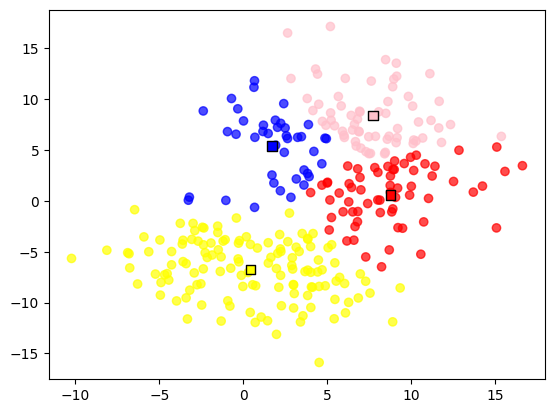

In [415]:
# Vẽ centroid với màu khác nhau cho phân cụm tốt nhất
colors = {0 : 'red', 1 : 'blue', 2 : 'yellow', 3 : 'pink', 4 : 'gray', 5 : 'brown'}
arrayColor = [colors[x] for x in goodLables]
plt.scatter(x[:, 0], x[:, 1], c=arrayColor, alpha=0.7)
arrarColorCentroid = [colors[x] for x in range(4)]
plt.scatter(goodCentroids[:, 0], goodCentroids[:, 1], marker='s', c=arrarColorCentroid, s=50, edgecolor='black')

In [416]:
# Tạo một điểm ngẫu nhiên và tính xem nó thuộc cụm nào với lần phần cụm tốt nhất
def checkAre(dot : np.array, centroids : np.array):
    arrayDistance = [getDistance(vectorA=dot, vectorB=x) for x in centroids]
    return np.argmin(arrayDistance)
dotInput = np.array([3, 4])
outAre = checkAre(dot=dotInput, centroids=goodCentroids)
print(f'Điểm {dotInput} thuộc cụm số : {outAre}, có màu là: {colors[outAre]}')


Điểm [3 4] thuộc cụm số : 1, có màu là: blue


3


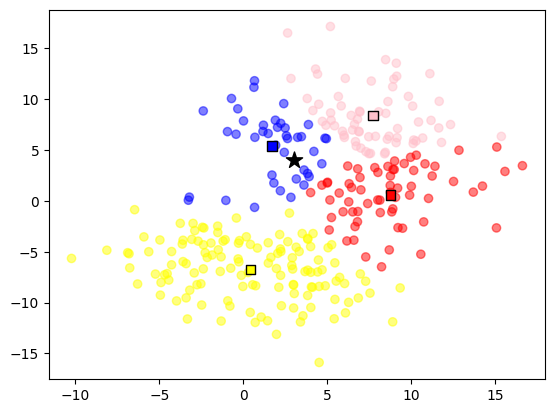

In [417]:
#  Vẽ tất cả các điểm với điểm đã dự đoán có marker là kim cương
plt.scatter(x[:, 0], x[:, 1], c=arrayColor, alpha=0.5)
arrarColorCentroid = [colors[x] for x in range(4)]
plt.scatter(goodCentroids[:, 0], goodCentroids[:, 1], marker='s', c=arrarColorCentroid, s=50, edgecolor='black')
print(dotInput[0])
plt.scatter(dotInput[0], dotInput[1], c='black', marker='*', s=150)
plt.show()